# Where's Waldo Data Augmentation

The data was collected from [this](https://www.kaggle.com/residentmario/wheres-waldo) Kaggle competition. However, the data for this competition comes in the form of images where waldo is there or not there.

So, I manually created bounding boxes and stored them in the `boxes-128.json` file.

Once I had the bounding boxes, I simply programmatically mapped them onto the original Where's Waldo maps to feed into the network.

In [1]:
import IPython.core.display as di

def toggle_code():
    di.display_html(
        """<button onclick="jQuery('.input_area').toggle();jQuery('.prompt').toggle();">
            Toggle code
        </button>""",
        raw=True,
    )

toggle_code()

Toggle code

In [59]:
import logging
import json
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from matplotlib import patches
from multiprocessor import Multiprocessor
from PIL import Image

log = logging.getLogger(__name__)

## Example Bounding Boxes

Here are three examples of bounding boxes that I manually curated from the data.

In [3]:
boxes_128 = {}
with open("boxes-128.json") as file:
    boxes_128 =json.loads(file.read())

In [4]:
waldo_labels = {
    waldo: np.array(Image.open(os.path.join("data", "128", "waldo", waldo)))
    for waldo in os.listdir(os.path.join("data", "128", "waldo"))
    if waldo.endswith(".jpg")
}

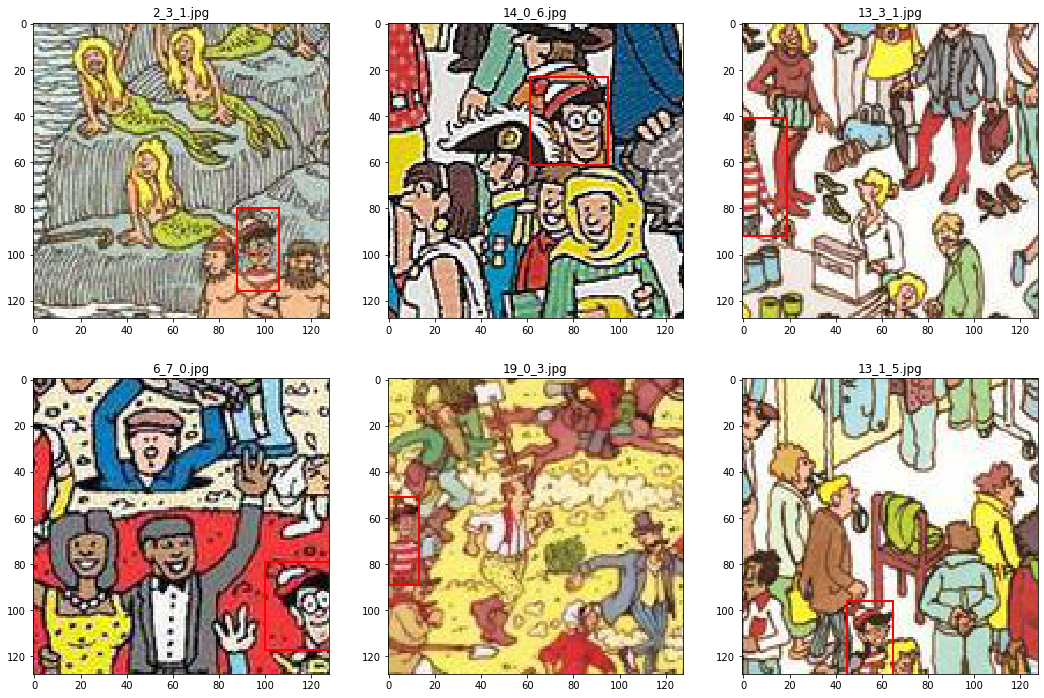

In [5]:
num_rows = 2 # len(boxes_128) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
for i, (waldo, image) in enumerate(waldo_labels.items()):
    if int(i//3) >= num_rows:
        break
    ax = axes[int(i//3), int(i%3)]
    ax.imshow(image)
    x, y, w, h = boxes_128[waldo]
    ax.add_patch(patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none'))
    ax.set_title(waldo)

plt.show()

## Map Bounding Boxes to Original Image

In [6]:
originals = {
    waldo: np.array(Image.open(os.path.join("data", "original-images", waldo)))
    for waldo in os.listdir(os.path.join("data", "original-images"))
    if waldo.endswith(".jpg")
}

13_3_1.jpg


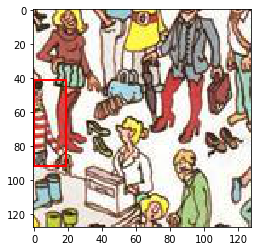

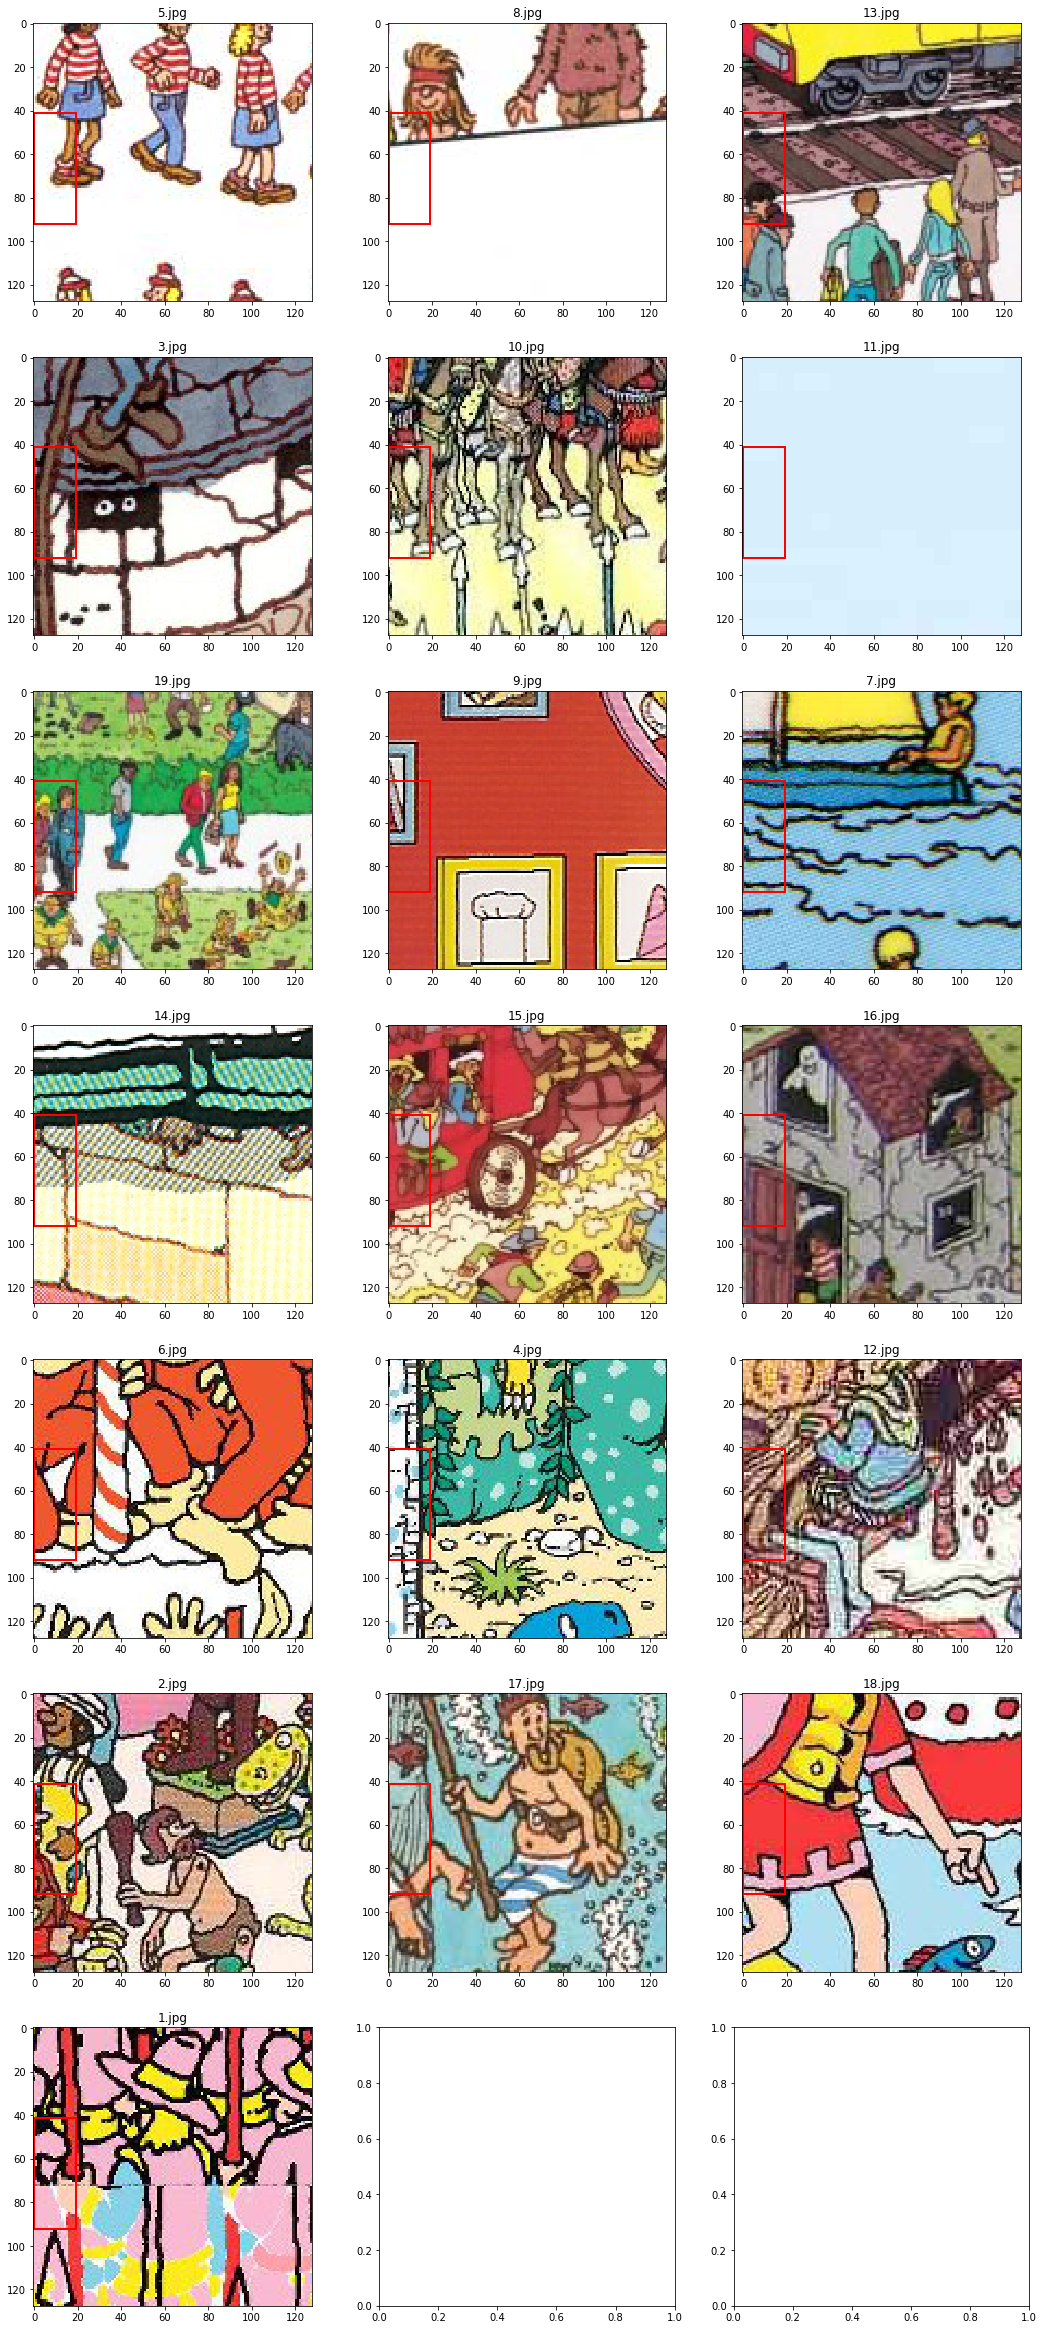

In [68]:
map_boxes_to_original = {
    "2_3_1.jpg": "17.jpg",
    "14_0_6.jpg": "9.jpg",
    "13_3_1.jpg": "".
    "": "",
}

waldo_name = next(waldo_name for waldo_name in waldo_labels if waldo_name not in map_boxes_to_original)

print(waldo_name)
fig, ax = plt.subplots(1)
ax.imshow(waldo_labels[waldo_name])
x, y, w, h = boxes_128[waldo_name]
ax.add_patch(patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none'))

plt.show()

original_images = list(originals.items())
results = [
    cv2.matchTemplate(original_image, waldo_labels[waldo_name], cv2.TM_CCOEFF_NORMED)
    for original_name, original_image in original_images
]
max_indices = [np.unravel_index(result.argmax(), result.shape) for result in results]

idx = np.argsort(-np.array([r.max() for r in results]))

num_rows = ceil(len(originals) / 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
for n, index in enumerate(idx):
    original_name, original_image = original_images[index]
    result = results[index]
    i, j = max_indices[index]
    
    ax = axes[n // 3, n % 3]
    ax.imshow(original_image[i:i+128, j:j+128])
    ax.add_patch(patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none'))
    ax.set_title(original_name)

In [46]:
def get_best_match(original_image, candidates):
    
    return name, result

def find_closest_match(waldo_names):
    matches = []
    for waldo_name in waldo_names:
        x, y, w, h = tuple(boxes_128[waldo_name])
        waldo_image = waldo_labels[waldo_name][y:y+h, x:x+w]
        
        original_file, result = max((
            (name, cv2.matchTemplate(originals[name], waldo_image, cv2.TM_CCOEFF_NORMED))
            for name, image in originals.items()
        ), key=lambda r: (r[1].max(), np.median(r[1]), r[1].mean()))
        
        i, j = np.unravel_index(result.argmax(), result.shape)
        matches.append((original_file, waldo_name, max(i-y, 0), max(j-x, 0)))
        
    return matches

In [47]:
processor = Multiprocessor(cpus=12)
matches = processor.process(find_closest_match, list(waldo_labels.keys()))

0 147
1287 1928
734 429
10 373
1032 930
1496 530
949 1202
710 168
576 811
1027 925
193 483
700 1031
1290 419
376 297
559 1585
754 37
96 143
0 1157
523 311
645 308
753 38
96 143
0 1157
0 2276
258 998
1082 482
1569 920


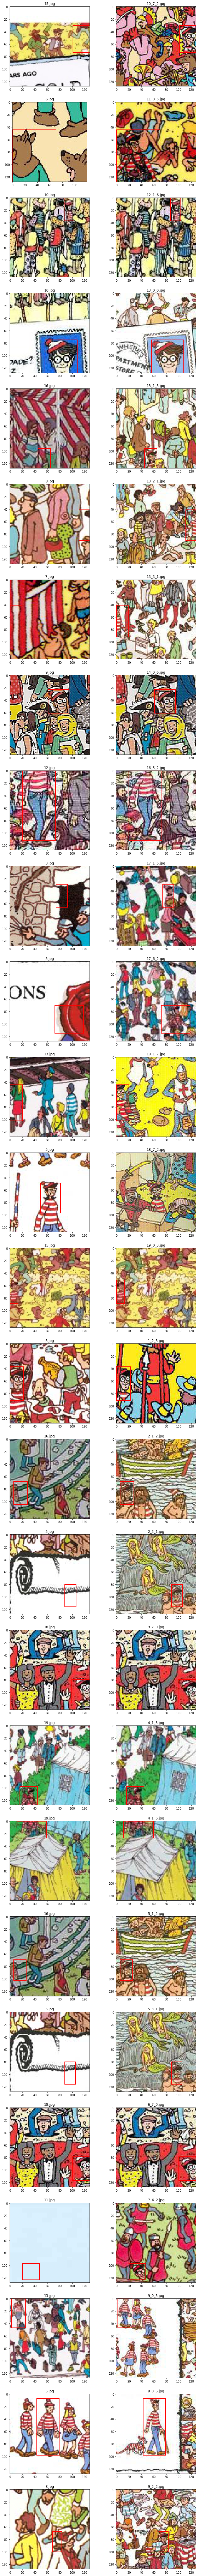

In [49]:
num_rows = len(waldo_matches)
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
for n, (original_file, waldo_file, i, j) in enumerate(waldo_matches):
    
    axes[n, 0].imshow(originals[original_file][i:i+128, j:j+128])
    axes[n, 0].set_title(original_file)
    
    x, y, w, h = boxes_128[waldo_file]
    axes[n, 0].add_patch(patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none'))
    
    axes[n, 1].imshow(waldo_labels[waldo_file])
    axes[n, 1].set_title(waldo_file)
    
    axes[n, 1].add_patch(patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none'))

plt.show()